### Basit doğrulas regrasyon modeli

In [1]:
import pandas as pd

In [8]:
# Burda dosya yolunu verip pandas ile veriyi okumasını sağlıyorum
df = pd.read_csv(r"C:\Users\realb\Desktop\ML_dersler\ML_201\Basit Doğrusal Regresyon Model\Advertising.csv")
# Bu alanda ise index değerlerini bir değişken gibi okumasının önüne geçmek için bu işlemi yaptım.
df = df.iloc[:,1:len(df)] 
# Bu alanda ise cvs dosyasından beş değerin ekrana getirilmesini sağladım.
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
# Veri setini tanıyalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
import seaborn as sns

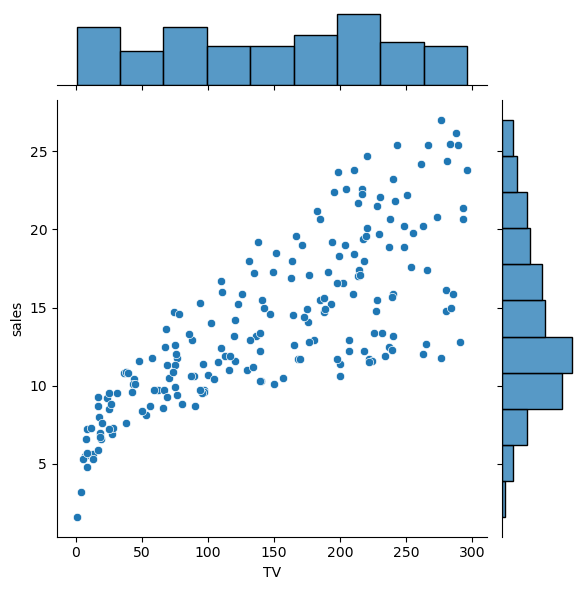

In [14]:
# Bu alanda veri gözlenmesi işlemlerini yapıyorum.
sns.jointplot(x="TV", y="sales", data= df)

'\n Bu alanda koreleasyon anlamında ve işlişki anlamında aralarındaki ilişkiyi gözlemleyebiliyorum.\n'

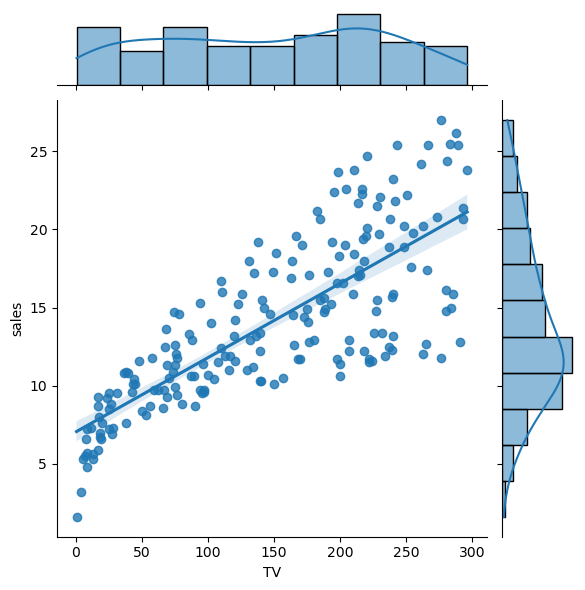

In [18]:
# BU alanda ise veri gözlemek yanı sıra türünüde gözlemleme işlemlerini yapıyorum.
sns.jointplot(x="TV", y="sales", data= df, kind="reg");

"""
 Bu alanda koreleasyon anlamında ve işlişki anlamında aralarındaki ilişkiyi gözlemleyebiliyorum.
"""

In [20]:
# BU modelleme işlemini sklearn kütüpanesi üzerinden linear_model özeliğini kulanıp bu işlemi yapmak istiyorum.
from sklearn.linear_model import LinearRegression

In [23]:
# Bağımsız değişken olacak şekilde tanımlamasını yaptım.
X = df[["TV"]]

In [24]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [62]:
# Bağımlı değişken olarak tanımlamasını yaptım.
Y = df["sales"]

In [26]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [27]:
# BU alanda linear regrasyon modelimi nesne olarak ekliyorum.
# BU işleme model nesnesi oluşturmak işlemi denir.
reg = LinearRegression()

In [69]:
model = reg.fit(X, Y)

In [65]:
# Modeli oluştur
model = LinearRegression()

In [31]:
str(model)

'LinearRegression()'

In [32]:
# Bu nesnenin içerisinden alabileçek olduğumuz bazı bilgiler olarak bu alanı tanımlasak çökta yanlış olmaz.
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

In [34]:
# Bu doğrusal regrasyonda bir sabit değerimiz olarak kullanabiliriz.
model.intercept_

array([7.03259355])

In [35]:
# Bu alanda ise kat sayı olarak kullana bileçeğimiz bir değer olarak tanımlamasını yapabiliriz.
model.coef_

array([[0.04753664]])

In [38]:
# rkare ifadesi modelin skorunu ifade eder.
# BU ifade bağımlı değişkendeki değişimin bağımsız değişenlerce acıklanma yüzdesidir.
model.score(X, Y)
# Bu örenkde bağımlı değişkenlerdeki satışların yüzde atmışı bağımsız değişkenlerce açıklanmaktadır.

0.611875050850071

# Tahmin

In [43]:
import seaborn as sns 
import matplotlib.pyplot as plt

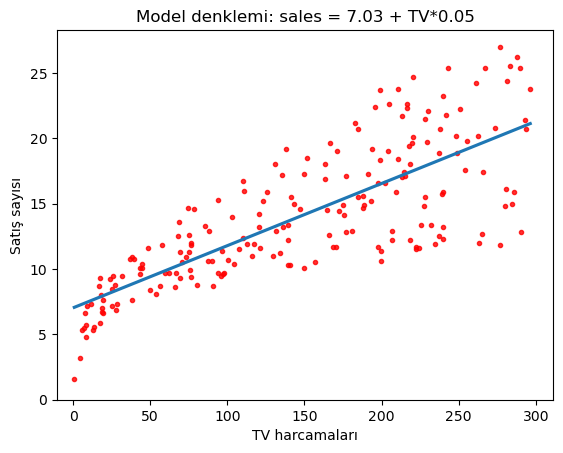

In [53]:
# Şimdi bir regrasyon görselleştirmesi yapaçağız. Bu işlemi tv ve sales değişkeni üzerinden yapaçağız. 'ci=None' etrafına güzen aralığı koyma demiş olaçağız.
#'color' kısmı ise renklendirme paremetreleri.
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
# Denkleme bir başlık eklemesi yapıyorum.
g.set_title("Model denklemi: sales = 7.03 + TV*0.05")
# Denklemin y boyutundaki değerlerini yazıyorum
g.set_ylabel("Satış sayısı")
# Denlemin x boyutundaki değerlerini yazıyorum
g.set_xlabel("TV harcamaları")
# X ekseni limitlerini belirliyorum
plt.xlim(-10.310)
# BUrada ise y ekseni limitlerini belirmesini yapıyorum.
plt.ylim(bottom=0);

In [51]:
# Şimdi burdan ben bir tahmin etme uygulaması yapmış olacağım ve bu işlem şu şekilde olmuş olacak.
7.03 + 0.05*250
# Bu işlem şunu ifade etmektedir ben 250 birimlik bir tv reklamı harcaması yaparsam bu reklam sonuçunda ne kadarlık bir geri kazanç sağlamış olurum.

19.53

In [63]:
model.predict([[270]])

C:\Users\realb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19.86748647]])

In [60]:
# ben bir yerden değil daha fazla veri ile bu değişkene veri girişi yapmak istersem bunu nasıl yaparım şu şekilde anlatıyım.
yeni_veri = [[10],[23],[39]]

In [64]:
model.predict(yeni_veri)

C:\Users\realb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.50795995],
       [8.12593628],
       [8.88652253]])

# Artıklar ve Makine öğrenmesi Önemi
# MSE hata kareler Ortalaması
# RMSE Hata kareler Ortalaması Karekökü

In [67]:
# BU ifade y sales değerlerimi gösterirken
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [70]:
# BU alan ise y değişkenimin benim tahmin etmeme yarayan bir alan olarak kalabilir.
model.predict(X)[0:6]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232])

In [72]:
gercek_y = Y[0:10]

In [75]:
tahmin_y = pd.DataFrame(model.predict(X)[0:10])

In [76]:
hatalar = pd.concat([gercek_y, tahmin_y], axis=1)

In [92]:
hatalar

,gercek,tahminler,Hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [94]:
# BU alan yaptığı işlem aslında şudur gerçek değerleri alıp onlar üzerinden bir tahmin edilme durumu oluşturuyoruz ve bunu tek bir tablo altında toplama işlemini yapıyoruz.
hatalar.columns = ["gercek", "tahminler", "hata"]
hatalar

,gercek,tahminler,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [96]:
# Modeli tahmin hatalarını incelemk istiyorum.,
hatalar["Hata"] = hatalar["gercek"] - hatalar["tahminler"]

In [97]:
# BUrda biz her gözlem türünde yapmış olduğumuz hataları incelemesini yapıyorum.
hatalar

,gercek,tahminler,hata,Hata
0,22.1,17.970775,4.129225,4.129225
1,10.4,9.147974,1.252026,1.252026
2,9.3,7.850224,1.449776,1.449776
3,18.5,14.234395,4.265605,4.265605
4,12.9,15.627218,-2.727218,-2.727218
5,7.2,7.446162,-0.246162,-0.246162
6,11.8,9.765950,2.034050,2.034050
7,13.2,12.746498,0.453502,0.453502
8,4.8,7.441409,-2.641409,-2.641409
9,10.6,16.530414,-5.930414,-5.930414


#MSE değeri hata kareler ortalaması

In [98]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [99]:
hatalar

,gercek,tahminler,hata,Hata,hata_kareler
0,22.1,17.970775,4.129225,4.129225,17.050503
1,10.4,9.147974,1.252026,1.252026,1.567569
2,9.3,7.850224,1.449776,1.449776,2.101851
3,18.5,14.234395,4.265605,4.265605,18.195390
4,12.9,15.627218,-2.727218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,-0.246162,0.060596
6,11.8,9.765950,2.034050,2.034050,4.137358
7,13.2,12.746498,0.453502,0.453502,0.205664
8,4.8,7.441409,-2.641409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,-5.930414,35.169814


In [101]:
import numpy as np

In [103]:
np.mean(hatalar["hata_kareler"]) # RMSE değerim olmuş oldu

9.290350329638104